## Построение линии регрессии

Линейная регрессия — метод машинного обучения, используемый для предсказания непрерывных значений на основе одного или нескольких входных признаков. Основная идея линейной регрессии заключается в нахождении линейной зависимости между входными признаками и целевой переменной.

# Датасет

*https://github.com/jakevdp/bicycle-data*

* *FremontBridge.csv comes from bicycle counter installed on Seattle's Fremont Bridge; it is available at https://data.seattle.gov/Transportation/Fremont-Bridge-Bicycle-Counter/65db-xm6k*

* *SeattleWeather.csv comes from NOAA data for weather station USW00024233, located at the Seattle-Tacoma International Airport; it is available at https://www.ncdc.noaa.gov/cdo-web/search?datasetid=GHCND*

Задача - предсказать количество велосипедистов.

In [1]:
import pandas as pd
counts = pd.read_csv('bicycle-data/FremontBridge.csv',
                     index_col='Date', parse_dates=True)
weather = pd.read_csv('bicycle-data/SeattleWeather.csv',
                      index_col='DATE', parse_dates=True)

In [2]:
counts.describe()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
count,147256.000000,147256.000000,147255.000000
mean,110.340794,50.077504,60.263699
std,140.421808,64.633895,87.252147
min,0.000000,0.000000,0.000000
25%,14.000000,6.000000,7.000000
50%,60.000000,28.000000,30.000000
75%,145.000000,68.000000,74.000000
max,1097.000000,698.000000,850.000000


In [3]:
weather.describe()

,AWND,FMTM,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,WDF2,...,WT04,WT05,WT08,WT09,WT13,WT14,WT16,WT17,WT18,WT22
count,3653.000000,31.000000,83.000000,3650.000000,3653.000000,3653.000000,3197.000000,3653.000000,3653.000000,3653.000000,...,10.0,4.0,215.0,1.0,195.0,53.0,268.0,1.0,20.0,9.0
mean,7.697167,9751.709677,1418.662651,0.115468,0.020504,0.030797,54.172662,61.651793,46.751437,177.850260,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
std,3.091159,1376.854245,674.707114,0.256013,0.293641,0.356801,10.654500,13.303158,9.054029,101.940814,...,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.0
min,0.890000,2333.000000,1.000000,0.000000,0.000000,0.000000,20.000000,27.000000,17.000000,2.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
25%,5.590000,9999.000000,1044.500000,0.000000,0.000000,0.000000,46.000000,51.000000,40.000000,110.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
50%,7.160000,9999.000000,1436.000000,0.000000,0.000000,0.000000,53.000000,60.000000,47.000000,200.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
75%,9.620000,9999.000000,1952.500000,0.110000,0.000000,0.000000,62.000000,72.000000,54.000000,230.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
max,21.250000,9999.000000,2358.000000,3.250000,8.900000,7.100000,91.000000,108.000000,73.000000,360.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [4]:
counts.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2019-11-01 00:00:00,12.0,7.0,5.0
2019-11-01 01:00:00,7.0,0.0,7.0
2019-11-01 02:00:00,1.0,0.0,1.0
2019-11-01 03:00:00,6.0,6.0,0.0
2019-11-01 04:00:00,6.0,5.0,1.0


In [5]:
weather.head()

,STATION,NAME,AWND,FMTM,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,...,WT04,WT05,WT08,WT09,WT13,WT14,WT16,WT17,WT18,WT22
DATE,,,,,,,,,,,,,,,,,,,,,
2012-01-01,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",10.51,NaN,NaN,0.00,0.0,0.0,NaN,55,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
2012-01-02,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",10.07,NaN,NaN,0.43,0.0,0.0,NaN,51,...,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
2012-01-03,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",5.14,NaN,NaN,0.03,0.0,0.0,NaN,53,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
2012-01-04,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",10.51,NaN,NaN,0.80,0.0,0.0,NaN,54,...,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
2012-01-05,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",13.65,NaN,NaN,0.05,0.0,0.0,NaN,48,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


In [6]:
print (counts.shape, weather.shape)

(147278, 3) (3653, 28)


# Преобразование

Ковид изменил количество велосипедистов, не учитываем ковидные данные.

In [7]:
counts = counts[counts.index < "2020-01-01"]
weather = weather[weather.index < "2020-01-01"]

Суммируем по дням

In [8]:
daily = counts.resample('d').sum()
daily['Total'] = daily.sum(axis=1)
daily = daily[['Total']]

Разная активность по дням недели

In [9]:
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
for i in range(7):
    daily[days[i]] = (daily.index.dayofweek == i).astype(float)

Температура и ветер

In [10]:
weather['Temp (F)'] = 0.5 * (weather['TMIN'] + weather['TMAX'])
daily = daily.join(weather[['Temp (F)', 'AWND']])

daily.head()

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,Temp (F),AWND
Date,,,,,,,,,,
2012-10-03,14084.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,56.0,16.33
2012-10-04,13900.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,56.5,14.54
2012-10-05,12592.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,59.5,12.75
2012-10-06,8024.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,60.5,11.41
2012-10-07,8568.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,60.5,2.91


# Корреляция

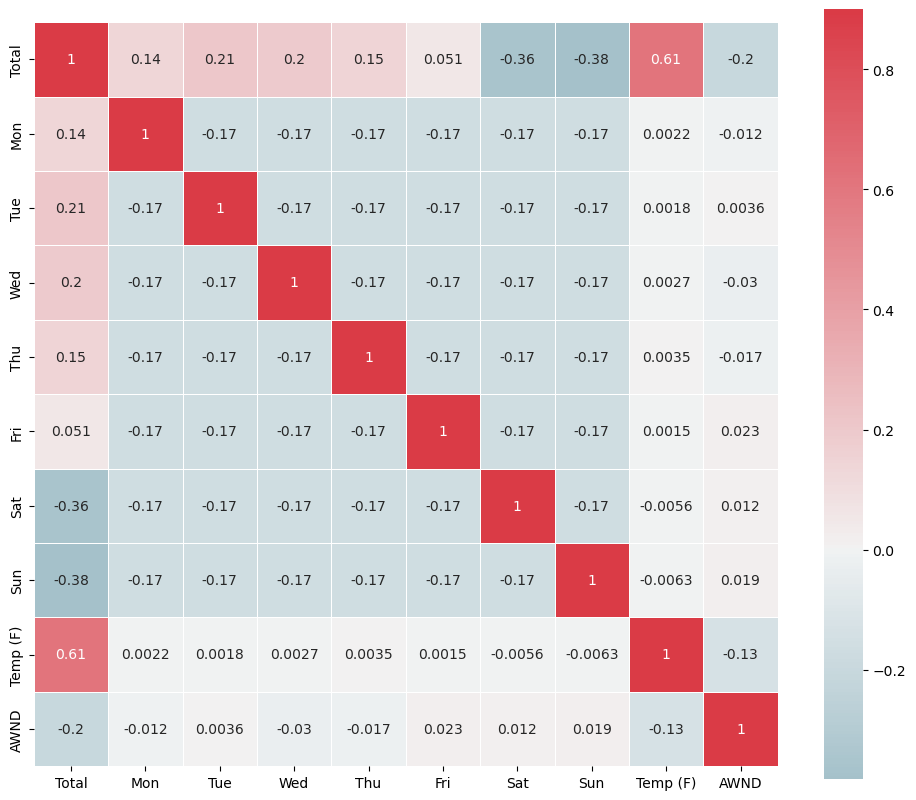

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = daily.corr()
f, ax = plt.subplots(figsize=(12, 10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmax=.9, center=0, square=True, linewidths=.5, annot=True)
plt.show()

# Модель

In [17]:
from sklearn.linear_model import LinearRegression 

daily.dropna(axis=0, how='any', inplace=True)

column_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun',
                'Temp (F)', 'AWND']
X = daily[column_names]
y = daily['Total']

model = LinearRegression(fit_intercept=False)
model.fit(X, y)
daily['predicted'] = model.predict(X)

In [24]:
model.get_params()

{'copy_X': True, 'fit_intercept': False, 'n_jobs': None, 'positive': False}

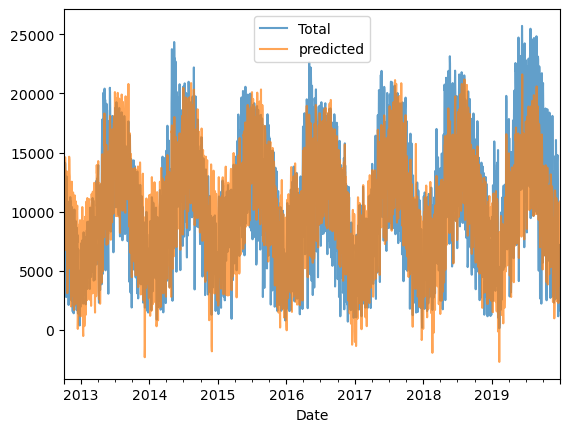

In [30]:
daily[['Total', 'predicted']].plot(alpha=0.7);

The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).  

A constant model that always predicts the expected value of y, disregarding the input features, would get a score of 0.0.

In [20]:
model.score(X,y)

0.7267065077984469

* На выходных меньше всего велосипедистов
* Во вторник почему-то больше всего
* Чем теплее, тем больше
* Чем ветреннее, тем меньше

In [22]:
pd.Series(model.coef_, index=X.columns)

Mon        -1878.602802
Tue         -991.153220
Wed        -1146.739805
Thu        -1839.028372
Fri        -3037.106490
Sat        -8535.429221
Sun        -8800.971731
Temp (F)     299.009046
AWND        -199.578127
dtype: float64